In [9]:
import numpy as np
import pandas as pd
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%pip install plotly
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

%pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%pip install xgboost

%pip install catboost
from xgboost import XGBClassifier

from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

%pip install interpret
from interpret.blackbox import LimeTabular
from interpret import show

%pip install lime
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import graphviz
import shap

import pickle

import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/758.0 kB ? eta -:--:--
     ---- ---------------------------------- 92.2/758.0 kB 2.6 MB/s eta 0:00:01
     ---------------- --------------------- 337.9/758.0 kB 4.2 MB/s eta 0:00:01
     --------------------------------- ---- 665.6/758.0 kB 5.2 MB/s eta 0:00:01
     ---------------------------------- --- 696.3/758.0 kB 4.0 MB/s eta 0:00:01
     -------------------------------------  747.5/758.0 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 758.0/758.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
    --------------------------------------- 0.2/13.0 MB 10.9 MB/s eta 0:00:02
   -- -----------------------------

In [10]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./02-14-2018.csv
./02-15-2018.csv
./02-16-2018.csv
./02-20-2018.csv
./02-21-2018.csv
./02-22-2018.csv
./02-23-2018.csv
./02-28-2018.csv
./03-01-2018.csv
./03-02-2018.csv
./main.ipynb
./main.py
./new.ipynb


In [12]:

network_data_d1 = pd.read_csv("./02-14-2018.csv", low_memory=False)


CPU times: total: 6.3 s
Wall time: 8.33 s


In [13]:
network_data_d1.head

<bound method NDFrame.head of          Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts   
0               0         0  14/02/2018 08:31:01      112641719             3  \
1               0         0  14/02/2018 08:33:50      112641466             3   
2               0         0  14/02/2018 08:36:39      112638623             3   
3              22         6  14/02/2018 08:40:13        6453966            15   
4              22         6  14/02/2018 08:40:23        8804066            14   
...           ...       ...                  ...            ...           ...   
1048570        80         6  14/02/2018 10:53:23       10156986             5   
1048571        80         6  14/02/2018 10:53:33            117             2   
1048572        80         6  14/02/2018 10:53:28        5095331             3   
1048573        80         6  14/02/2018 10:53:28        5235511             3   
1048574       443         6  14/02/2018 10:53:28        5807256             6  

In [14]:
network_data_d2 = pd.read_csv("./02-15-2018.csv", low_memory=False)

In [15]:
network_data_d3 = pd.read_csv("./02-16-2018.csv", low_memory=False)

In [16]:
network_data_d4 = pd.read_csv("./02-20-2018.csv", low_memory=False)

In [17]:
network_data_d5 = pd.read_csv("./02-21-2018.csv", low_memory=False)

In [18]:
network_data_d6 = pd.read_csv("./02-22-2018.csv", low_memory=False)

In [19]:
network_data_d7 = pd.read_csv("./02-23-2018.csv", low_memory=False)

In [20]:
network_data_d8 = pd.read_csv("./02-28-2018.csv", low_memory=False)

In [21]:
network_data_d9 = pd.read_csv("./03-01-2018.csv", low_memory=False)

In [22]:

network_data_d10 = pd.read_csv("./03-02-2018.csv", low_memory=False)

In [23]:
network_data_d4.drop(columns=['Flow ID', 'Src IP', 'Src Port', 'Dst IP'], axis=1,inplace=True)

In [24]:
def fixDataType(df_dataset):
    
    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']
    
    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)
    
    return df_dataset

In [25]:
network_data_d1 = fixDataType(network_data_d1)
network_data_d2 = fixDataType(network_data_d2)
network_data_d3 = fixDataType(network_data_d3)
network_data_d4 = fixDataType(network_data_d4)
network_data_d5 = fixDataType(network_data_d5)
network_data_d6 = fixDataType(network_data_d6)
network_data_d7 = fixDataType(network_data_d7)
network_data_d8 = fixDataType(network_data_d8)
network_data_d9 = fixDataType(network_data_d9)
network_data_d10 = fixDataType(network_data_d10)

In [26]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['Label'].value_counts())
    print("\n\n\n")

In [27]:
dataProperties(network_data_d1, "Day 1")
dataProperties(network_data_d2, "Day 2")
dataProperties(network_data_d3, "Day 3")
dataProperties(network_data_d4, "Day 4")
dataProperties(network_data_d5, "Day 5")
dataProperties(network_data_d6, "Day 6")
dataProperties(network_data_d7, "Day 7")
dataProperties(network_data_d8, "Day 8")
dataProperties(network_data_d9, "Day 9")
dataProperties(network_data_d10, "Day 10")

Day 1
Number of rows (Samples):  1048575
Number of columns (Features):  80
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64




Day 2
Number of rows (Samples):  1048575
Number of columns (Features):  80
Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64




Day 3
Number of rows (Samples):  1048574
Number of columns (Features):  80
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64




Day 4
Number of rows (Samples):  7948748
Number of columns (Features):  80
Label
Benign                    7372557
DDoS attacks-LOIC-HTTP     576191
Name: count, dtype: int64




Day 5
Number of rows (Samples):  1048575
Number of columns (Features):  80
Label
DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: count, dtype: int64




Day 6
Nu

In [28]:
def visualizeBar(df):
    # bar chart of packets label
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    # plt.bar(x=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], height=network_data['Label'].value_counts(), color=['blue', 'magenta', 'cyan'])
    plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts())
    p = plt.gcf()

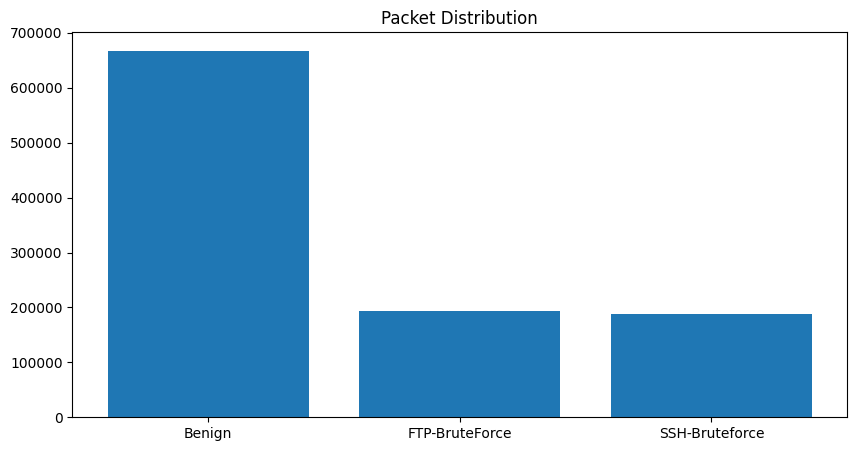

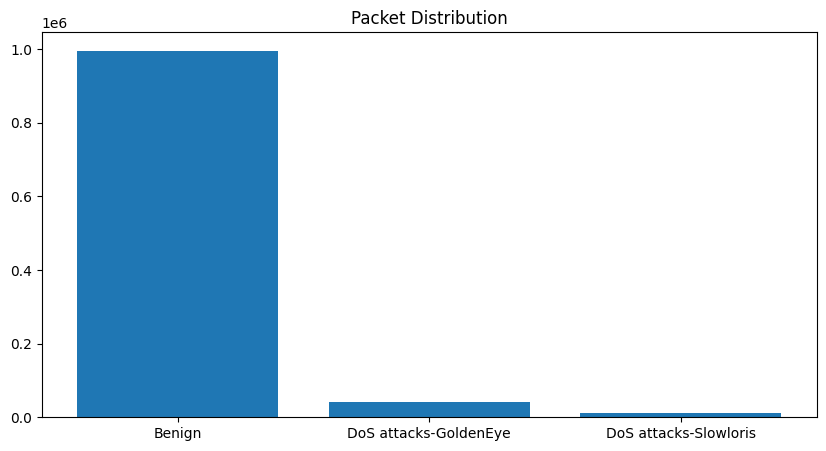

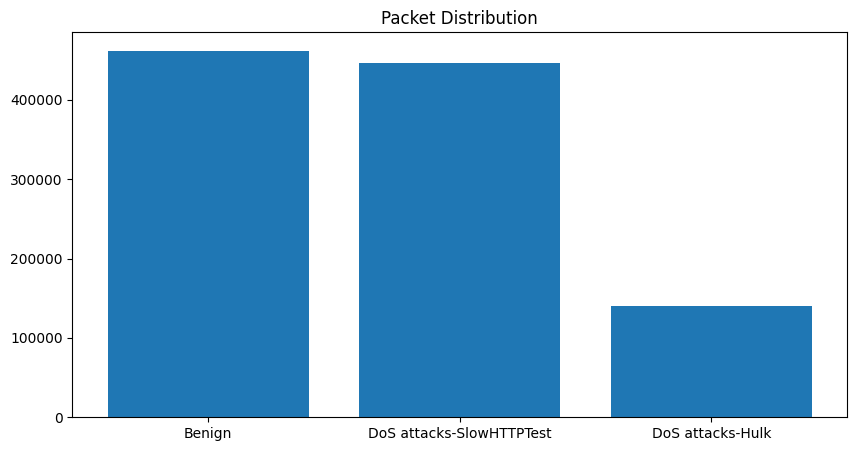

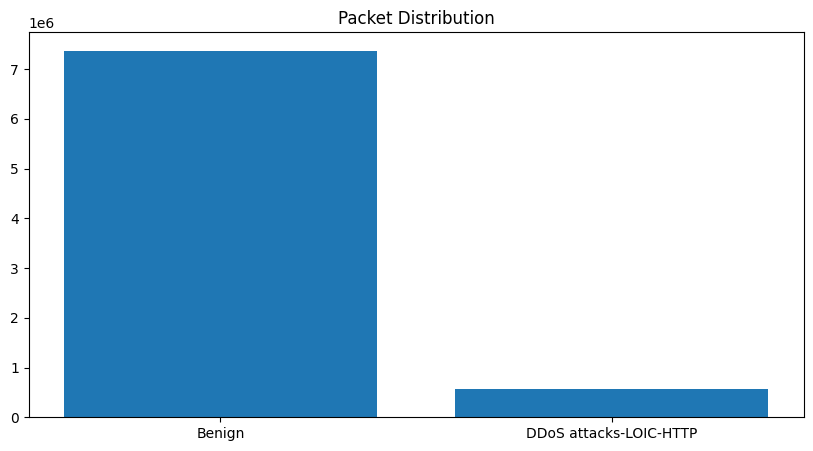

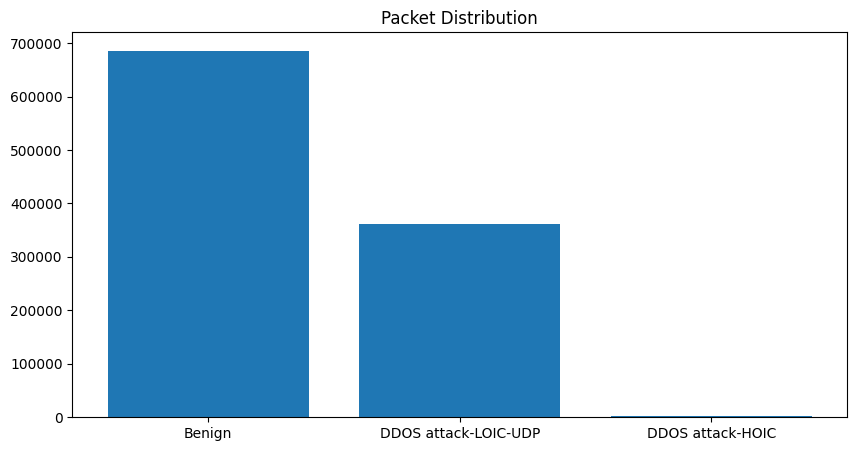

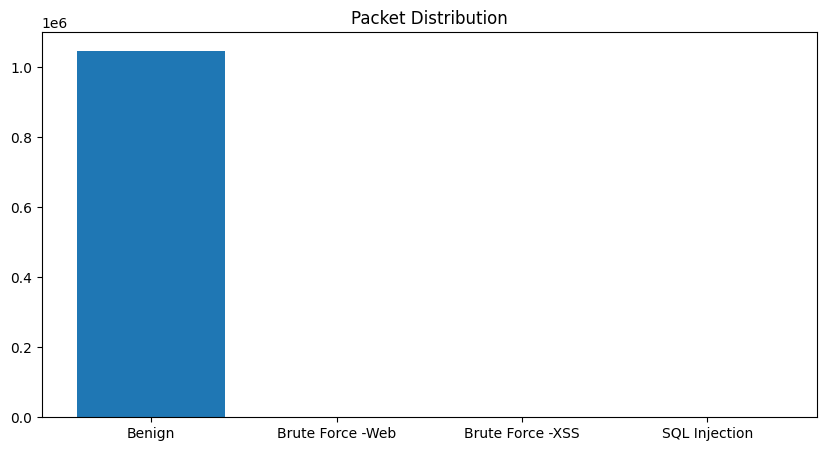

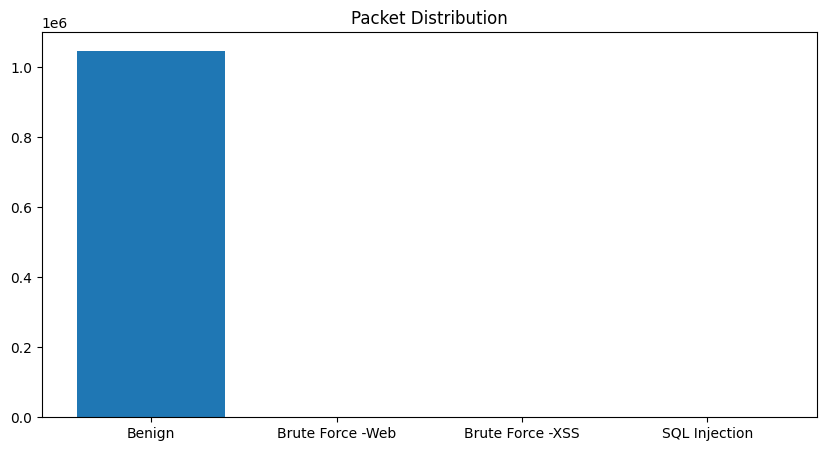

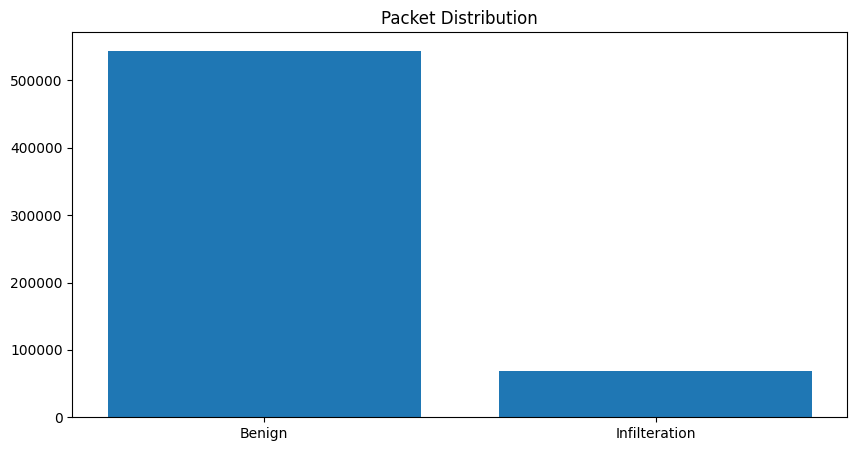

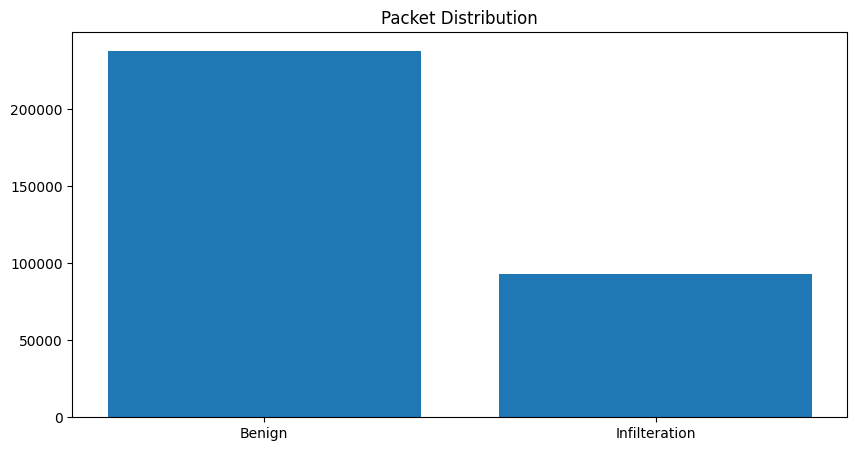

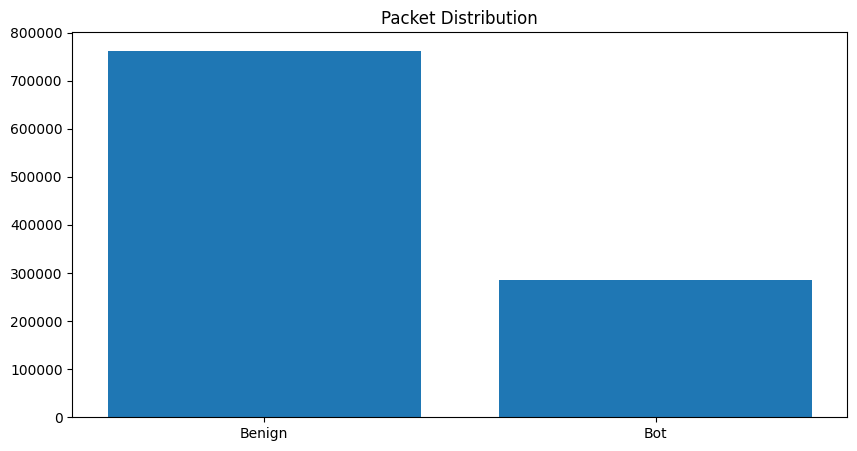

In [29]:
visualizeBar(network_data_d1)
visualizeBar(network_data_d2)
visualizeBar(network_data_d3)
visualizeBar(network_data_d4)
visualizeBar(network_data_d5)
visualizeBar(network_data_d6)
visualizeBar(network_data_d7)
visualizeBar(network_data_d8)
visualizeBar(network_data_d9)
visualizeBar(network_data_d10)

In [30]:
def visualizePie(df):
    # pie chart of packets label
    plt.figure(figsize=(5, 5))
    circle = plt.Circle((0, 0), 0.7, color='white')
    plt.title('Packet Distribution')
    # plt.pie(network_data_d1['Label'].value_counts(), labels=['Benign', 'FTP-BruteForce', 'SSH-Bruteforce'], colors=['blue', 'magenta', 'cyan'])
    plt.pie(df['Label'].value_counts(), labels=df['Label'].unique())
    p = plt.gcf()
    p.gca().add_artist(circle)

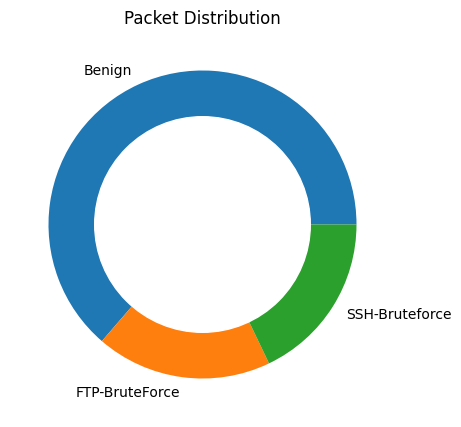

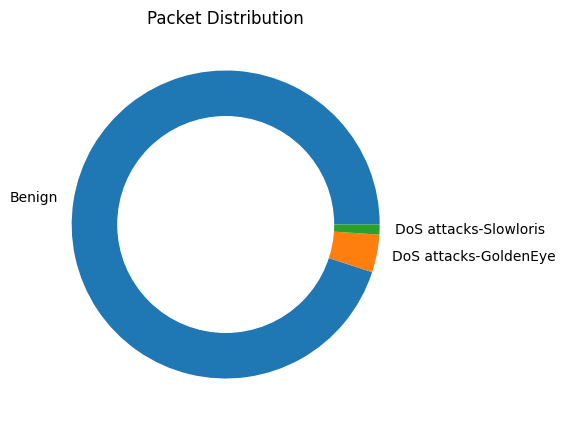

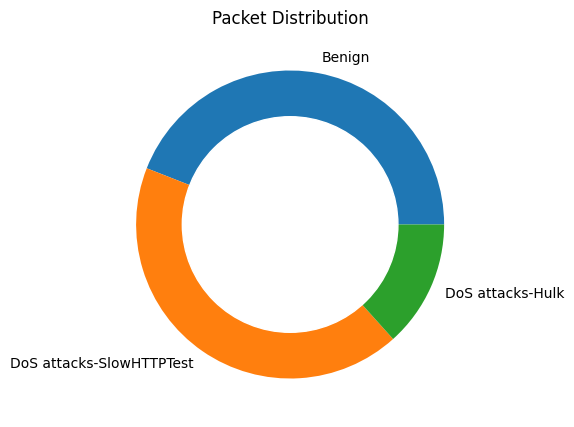

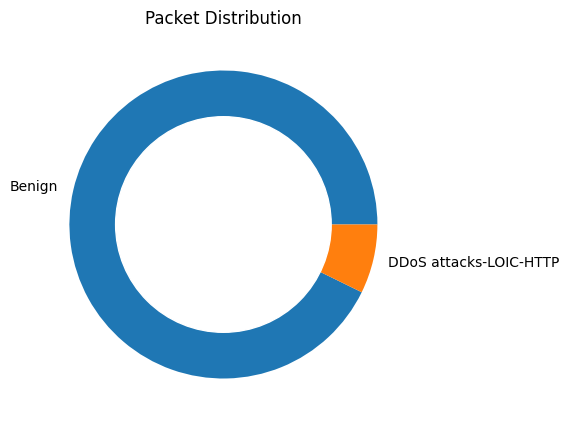

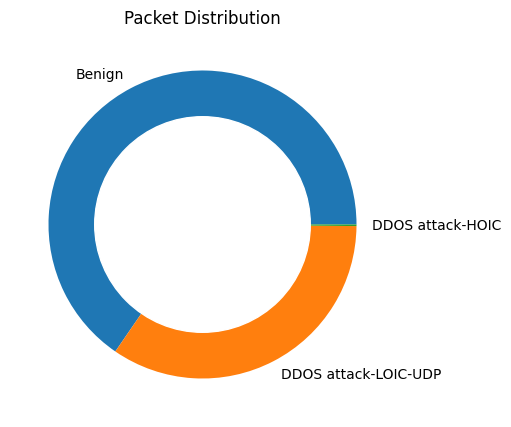

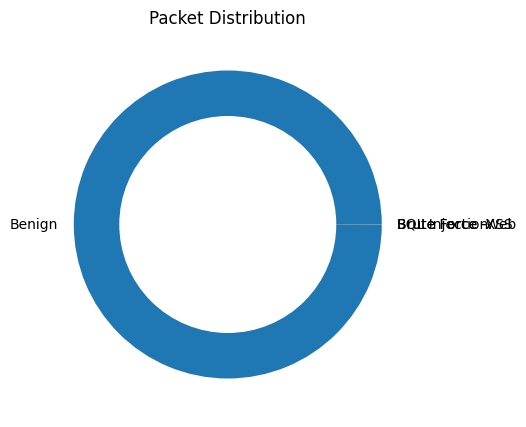

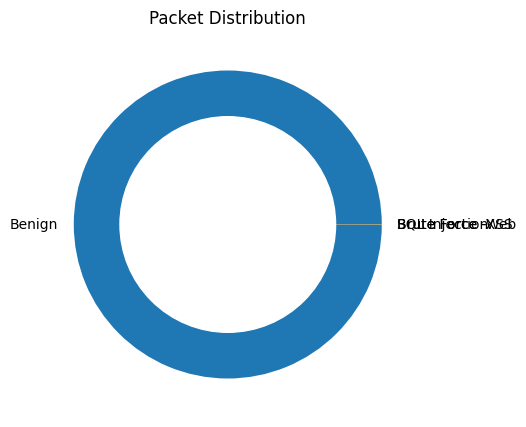

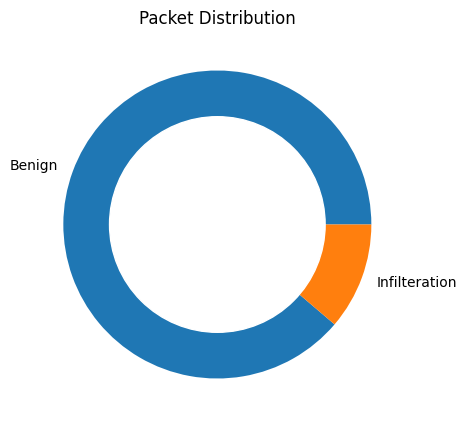

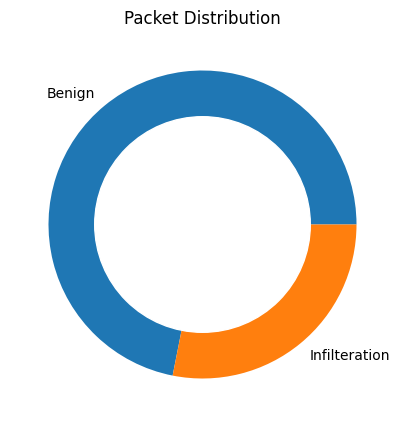

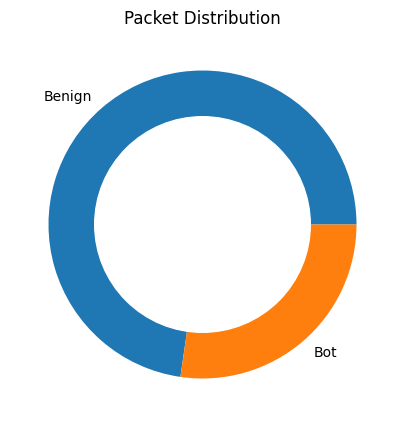

In [31]:
visualizePie(network_data_d1)
visualizePie(network_data_d2)
visualizePie(network_data_d3)
visualizePie(network_data_d4)
visualizePie(network_data_d5)
visualizePie(network_data_d6)
visualizePie(network_data_d7)
visualizePie(network_data_d8)
visualizePie(network_data_d9)
visualizePie(network_data_d10)

In [32]:
def dropInfinateNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)
    
    return df

In [33]:
network_data_d1 = dropInfinateNull(network_data_d1)
network_data_d2 = dropInfinateNull(network_data_d2)
network_data_d3 = dropInfinateNull(network_data_d3)
network_data_d4 = dropInfinateNull(network_data_d4)
network_data_d5 = dropInfinateNull(network_data_d5)
network_data_d6 = dropInfinateNull(network_data_d6)
network_data_d7 = dropInfinateNull(network_data_d7)
network_data_d8 = dropInfinateNull(network_data_d8)
network_data_d9 = dropInfinateNull(network_data_d9)
network_data_d10 = dropInfinateNull(network_data_d10)

(1048575, 80)
(1044751, 80)
(1048575, 80)
(1040548, 80)
(1048574, 80)
(1048574, 80)
(7948748, 80)
(7889295, 80)
(1048575, 80)
(1048575, 80)
(1048575, 80)
(1042965, 80)
(1048575, 80)
(1042867, 80)
(613071, 80)
(606902, 80)
(331100, 80)
(328181, 80)
(1048575, 80)
(1044525, 80)


In [34]:
def dropUnnecessaryColumn(df): 
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [35]:
network_data_d1 = dropUnnecessaryColumn(network_data_d1)
network_data_d2 = dropUnnecessaryColumn(network_data_d2)
network_data_d3 = dropUnnecessaryColumn(network_data_d3)
network_data_d4 = dropUnnecessaryColumn(network_data_d4)
network_data_d5 = dropUnnecessaryColumn(network_data_d5)
network_data_d6 = dropUnnecessaryColumn(network_data_d6)
network_data_d7 = dropUnnecessaryColumn(network_data_d7)
network_data_d8 = dropUnnecessaryColumn(network_data_d8)
network_data_d9 = dropUnnecessaryColumn(network_data_d9)
network_data_d10 = dropUnnecessaryColumn(network_data_d10)

(1044751, 79)
(1040548, 79)
(1048574, 79)
(7889295, 79)
(1048575, 79)
(1042965, 79)
(1042867, 79)
(606902, 79)
(328181, 79)
(1044525, 79)


In [36]:
def transformTargetLabelToBinary(df):
    # encode the target feature
    df['Label'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Label'].unique())
    print(df['Label'].value_counts())
    return df

In [37]:
network_data_d1 = transformTargetLabelToBinary(network_data_d1)
network_data_d2 = transformTargetLabelToBinary(network_data_d2)
network_data_d3 = transformTargetLabelToBinary(network_data_d3)
network_data_d4 = transformTargetLabelToBinary(network_data_d4)
network_data_d5 = transformTargetLabelToBinary(network_data_d5)
network_data_d6 = transformTargetLabelToBinary(network_data_d6)
network_data_d7 = transformTargetLabelToBinary(network_data_d7)
network_data_d8 = transformTargetLabelToBinary(network_data_d8)
network_data_d9 = transformTargetLabelToBinary(network_data_d9)
network_data_d10 = transformTargetLabelToBinary(network_data_d10)

['Benign' 'Malicious']
Label
Benign       663808
Malicious    380943
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       988050
Malicious     52498
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Malicious    601802
Benign       446772
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       7313104
Malicious     576191
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Malicious    687742
Benign       360833
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       1042603
Malicious        362
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       1042301
Malicious        566
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       538666
Malicious     68236
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       235778
Malicious     92403
Name: count, dtype: int64
['Benign' 'Malicious']
Label
Benign       758334
Malicious    286191
Name: count, dtype: int64


In [38]:
def balanceData(df):
    # split data into features and target
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    # applying oversampling
    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y) # insted of X, y use the direct syntex

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())
    
    return df



In [39]:
network_data_d1 = balanceData(network_data_d1)
network_data_d2 = balanceData(network_data_d2)
network_data_d3 = balanceData(network_data_d3)
network_data_d4 = balanceData(network_data_d4)
network_data_d5 = balanceData(network_data_d5)
network_data_d6 = balanceData(network_data_d6)
network_data_d7 = balanceData(network_data_d7)
network_data_d8 = balanceData(network_data_d8)
network_data_d9 = balanceData(network_data_d9)
network_data_d10 = balanceData(network_data_d10)

(761886, 79)
Label
Benign       380943
Malicious    380943
Name: count, dtype: int64
(104996, 79)
Label
Benign       52498
Malicious    52498
Name: count, dtype: int64
(893544, 79)
Label
Benign       446772
Malicious    446772
Name: count, dtype: int64
(1152382, 79)
Label
Benign       576191
Malicious    576191
Name: count, dtype: int64
(721666, 79)
Label
Benign       360833
Malicious    360833
Name: count, dtype: int64
(724, 79)
Label
Benign       362
Malicious    362
Name: count, dtype: int64
(1132, 79)
Label
Benign       566
Malicious    566
Name: count, dtype: int64
(136472, 79)
Label
Benign       68236
Malicious    68236
Name: count, dtype: int64
(184806, 79)
Label
Benign       92403
Malicious    92403
Name: count, dtype: int64
(572382, 79)
Label
Benign       286191
Malicious    286191
Name: count, dtype: int64


In [40]:
network_data = pd.concat([network_data_d1, network_data_d2], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d1, network_data_d2

network_data = pd.concat([network_data, network_data_d3], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d3

# network_data = network_data_d3
# del network_data_d3

network_data = pd.concat([network_data, network_data_d4], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d4

network_data = pd.concat([network_data, network_data_d5], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d5

network_data = pd.concat([network_data, network_data_d6], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d6

network_data = pd.concat([network_data, network_data_d7], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d7

network_data = pd.concat([network_data, network_data_d8], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d8

network_data = pd.concat([network_data, network_data_d9], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d9

network_data = pd.concat([network_data, network_data_d10], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d10

In [41]:
network_data['Label'].value_counts()

Label
Benign       2264995
Malicious    2264995
Name: count, dtype: int64

In [42]:
network_data.to_csv('./dataset.csv', index = False)

In [43]:
#drop constant

In [44]:
variances = network_data.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data = network_data.drop(constant_columns, axis=1)

print(constant_columns)
print (network_data.shape)

Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg',
       'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg',
       'Bwd Blk Rate Avg'],
      dtype='object')
(4529990, 71)


In [45]:
duplicates = set()
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i]
    for j in range(i+1, len(network_data.columns)):
        col2 = network_data.columns[j]
        if(network_data[col1].equals(network_data[col2])):
            duplicates.add(col2)

print (duplicates)
network_data.drop(duplicates, axis=1, inplace=True)
print (network_data.shape)

{'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'CWE Flag Count', 'SYN Flag Cnt', 'Subflow Fwd Pkts'}
(4529990, 66)


In [46]:
network_data['Label'] = network_data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)
print(network_data['Label'].unique())

[0 1]


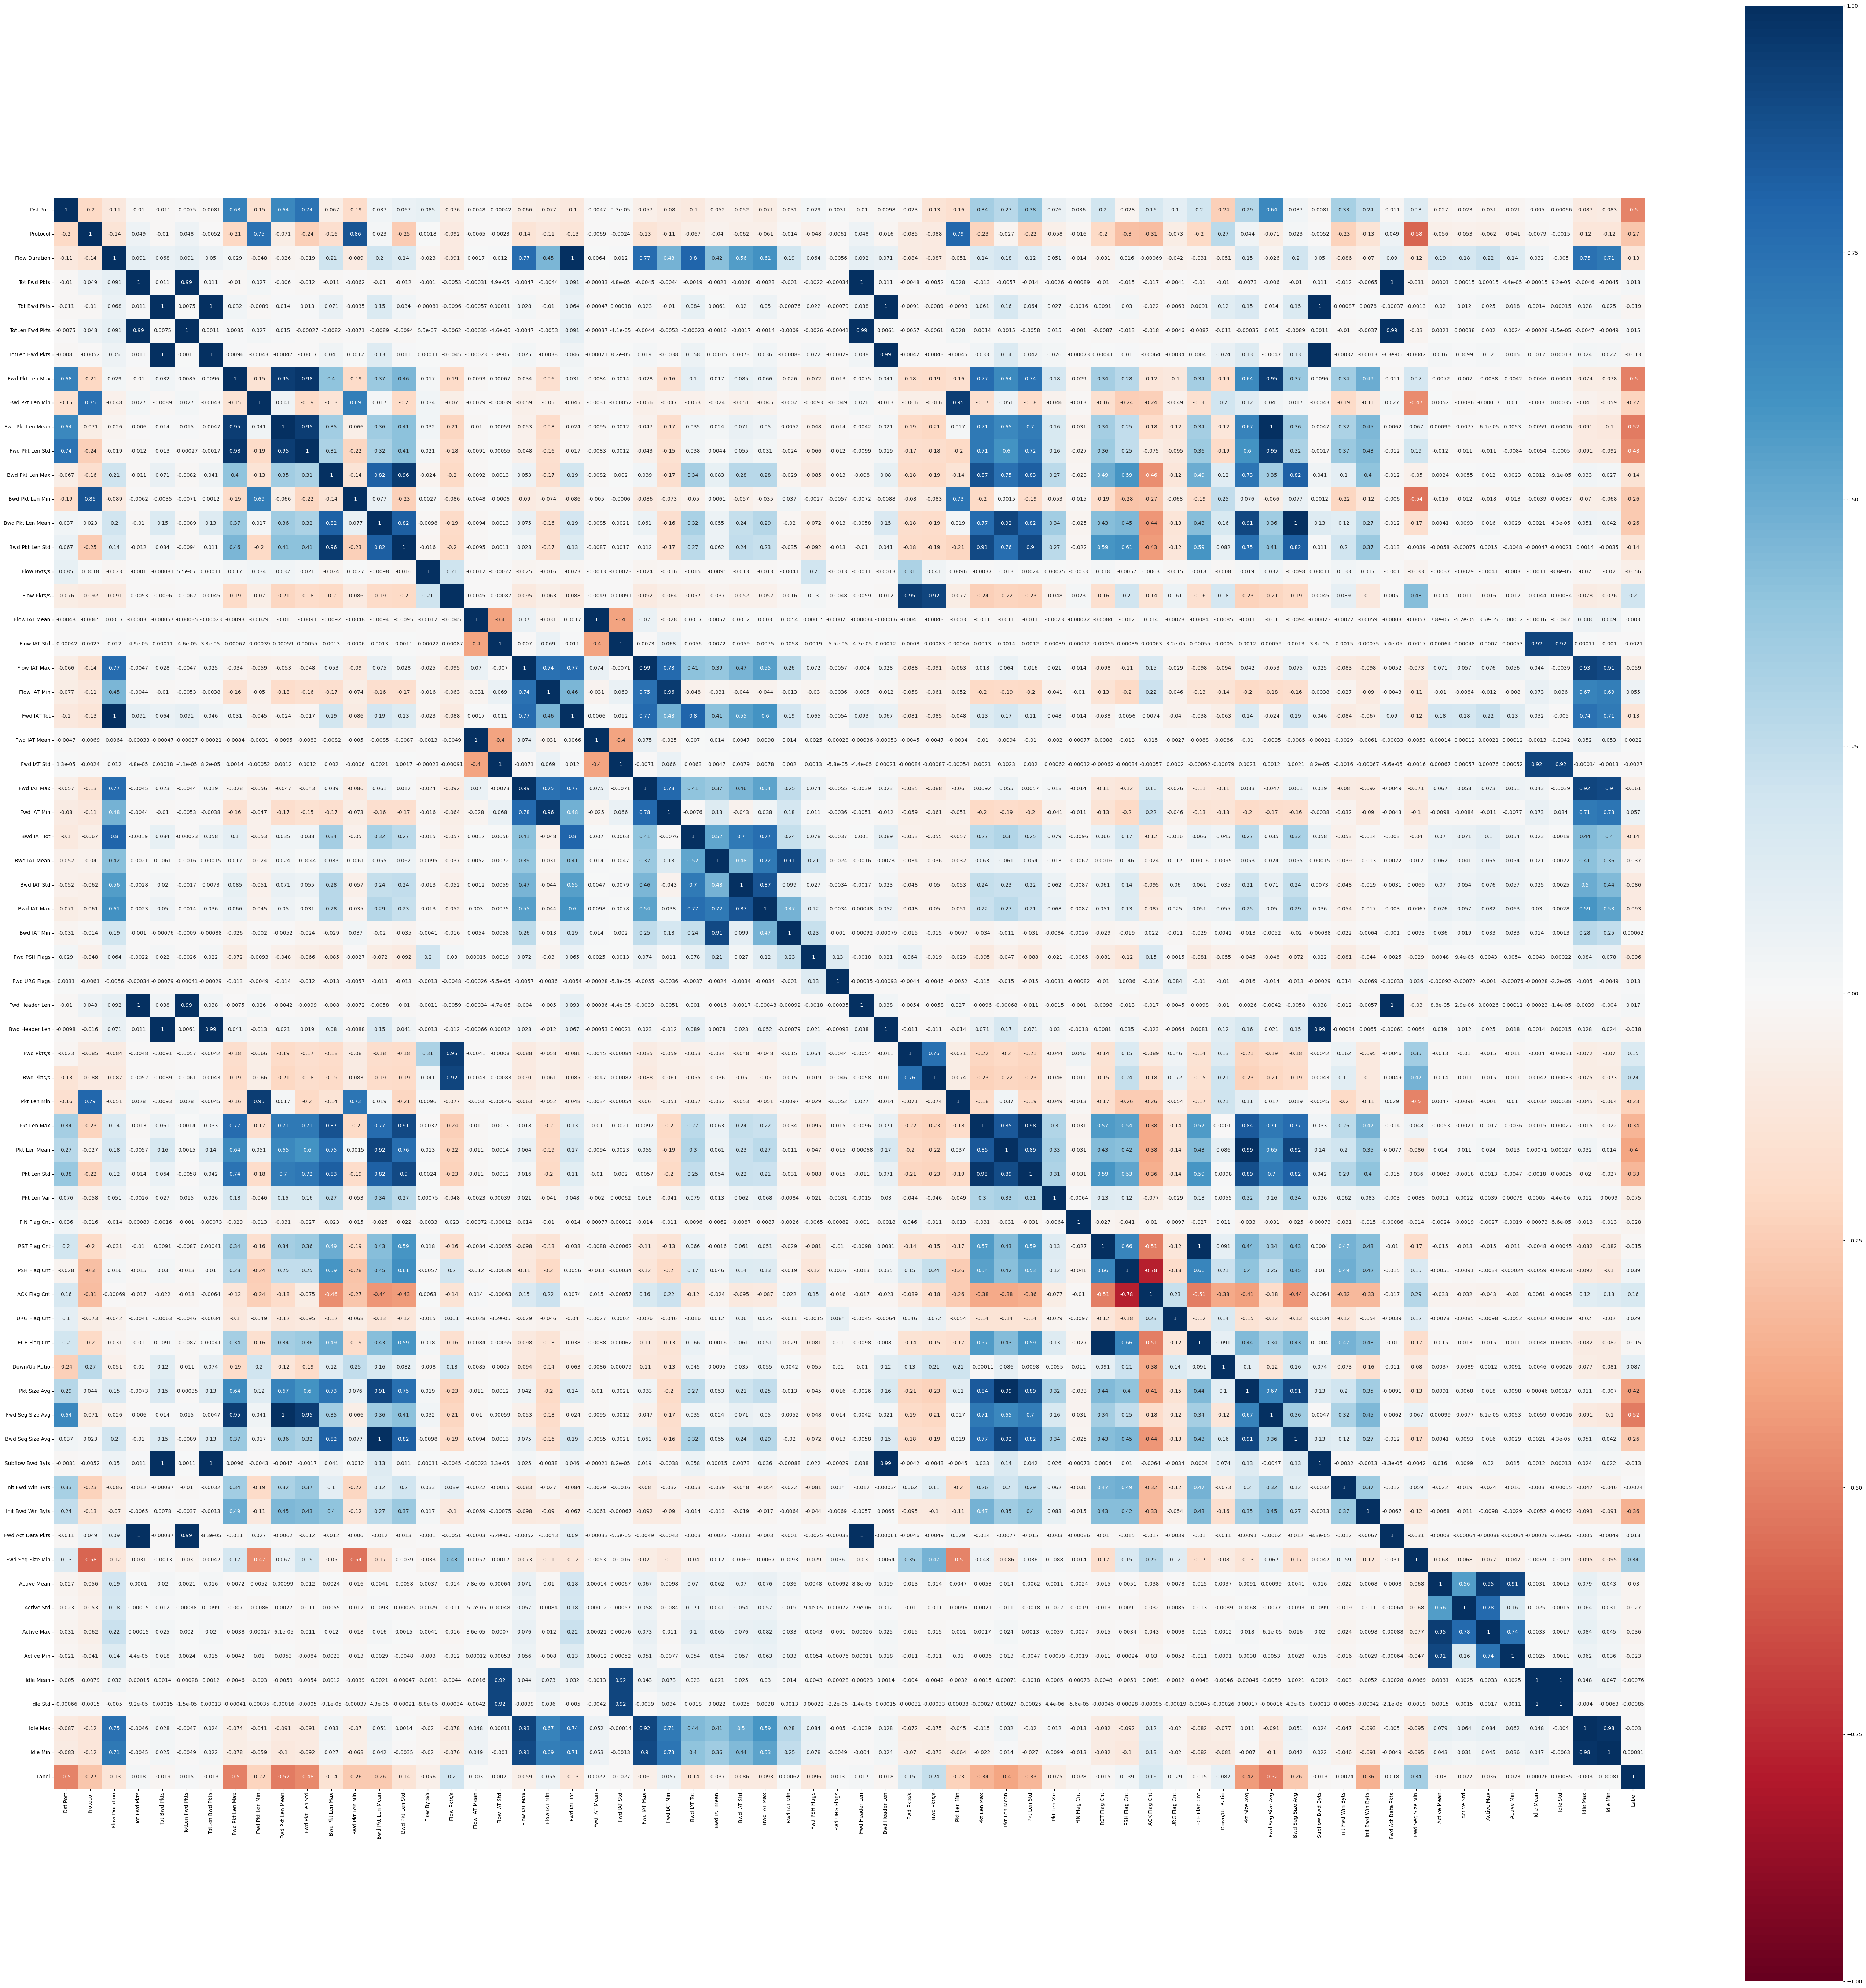

In [48]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [49]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'RST Flag Cnt', 'Fwd Pkt Len Std', 'Flow IAT Mean', 'Bwd Header Len', 'Flow Duration', 'Fwd Pkt Len Max', 'Flow Pkts/s', 'Pkt Len Mean', 'Idle Mean', 'Bwd IAT Mean', 'Fwd IAT Std', 'Fwd Pkt Len Min', 'Bwd Pkt Len Std', 'Idle Max', 'Bwd Pkt Len Mean', 'Pkt Len Max', 'Flow IAT Max', 'Fwd IAT Max', 'Tot Bwd Pkts', 'Flow IAT Min', 'Bwd Pkt Len Max', 'Tot Fwd Pkts', 'Flow IAT Std', 'Fwd Header Len', 'TotLen Bwd Pkts', 'Fwd Pkt Len Mean', 'Pkt Size Avg', 'TotLen Fwd Pkts', 'Active Mean'}
29


In [50]:
network_data.drop(correlated_col, axis=1, inplace=True)
print (network_data.shape)

(4529990, 37)


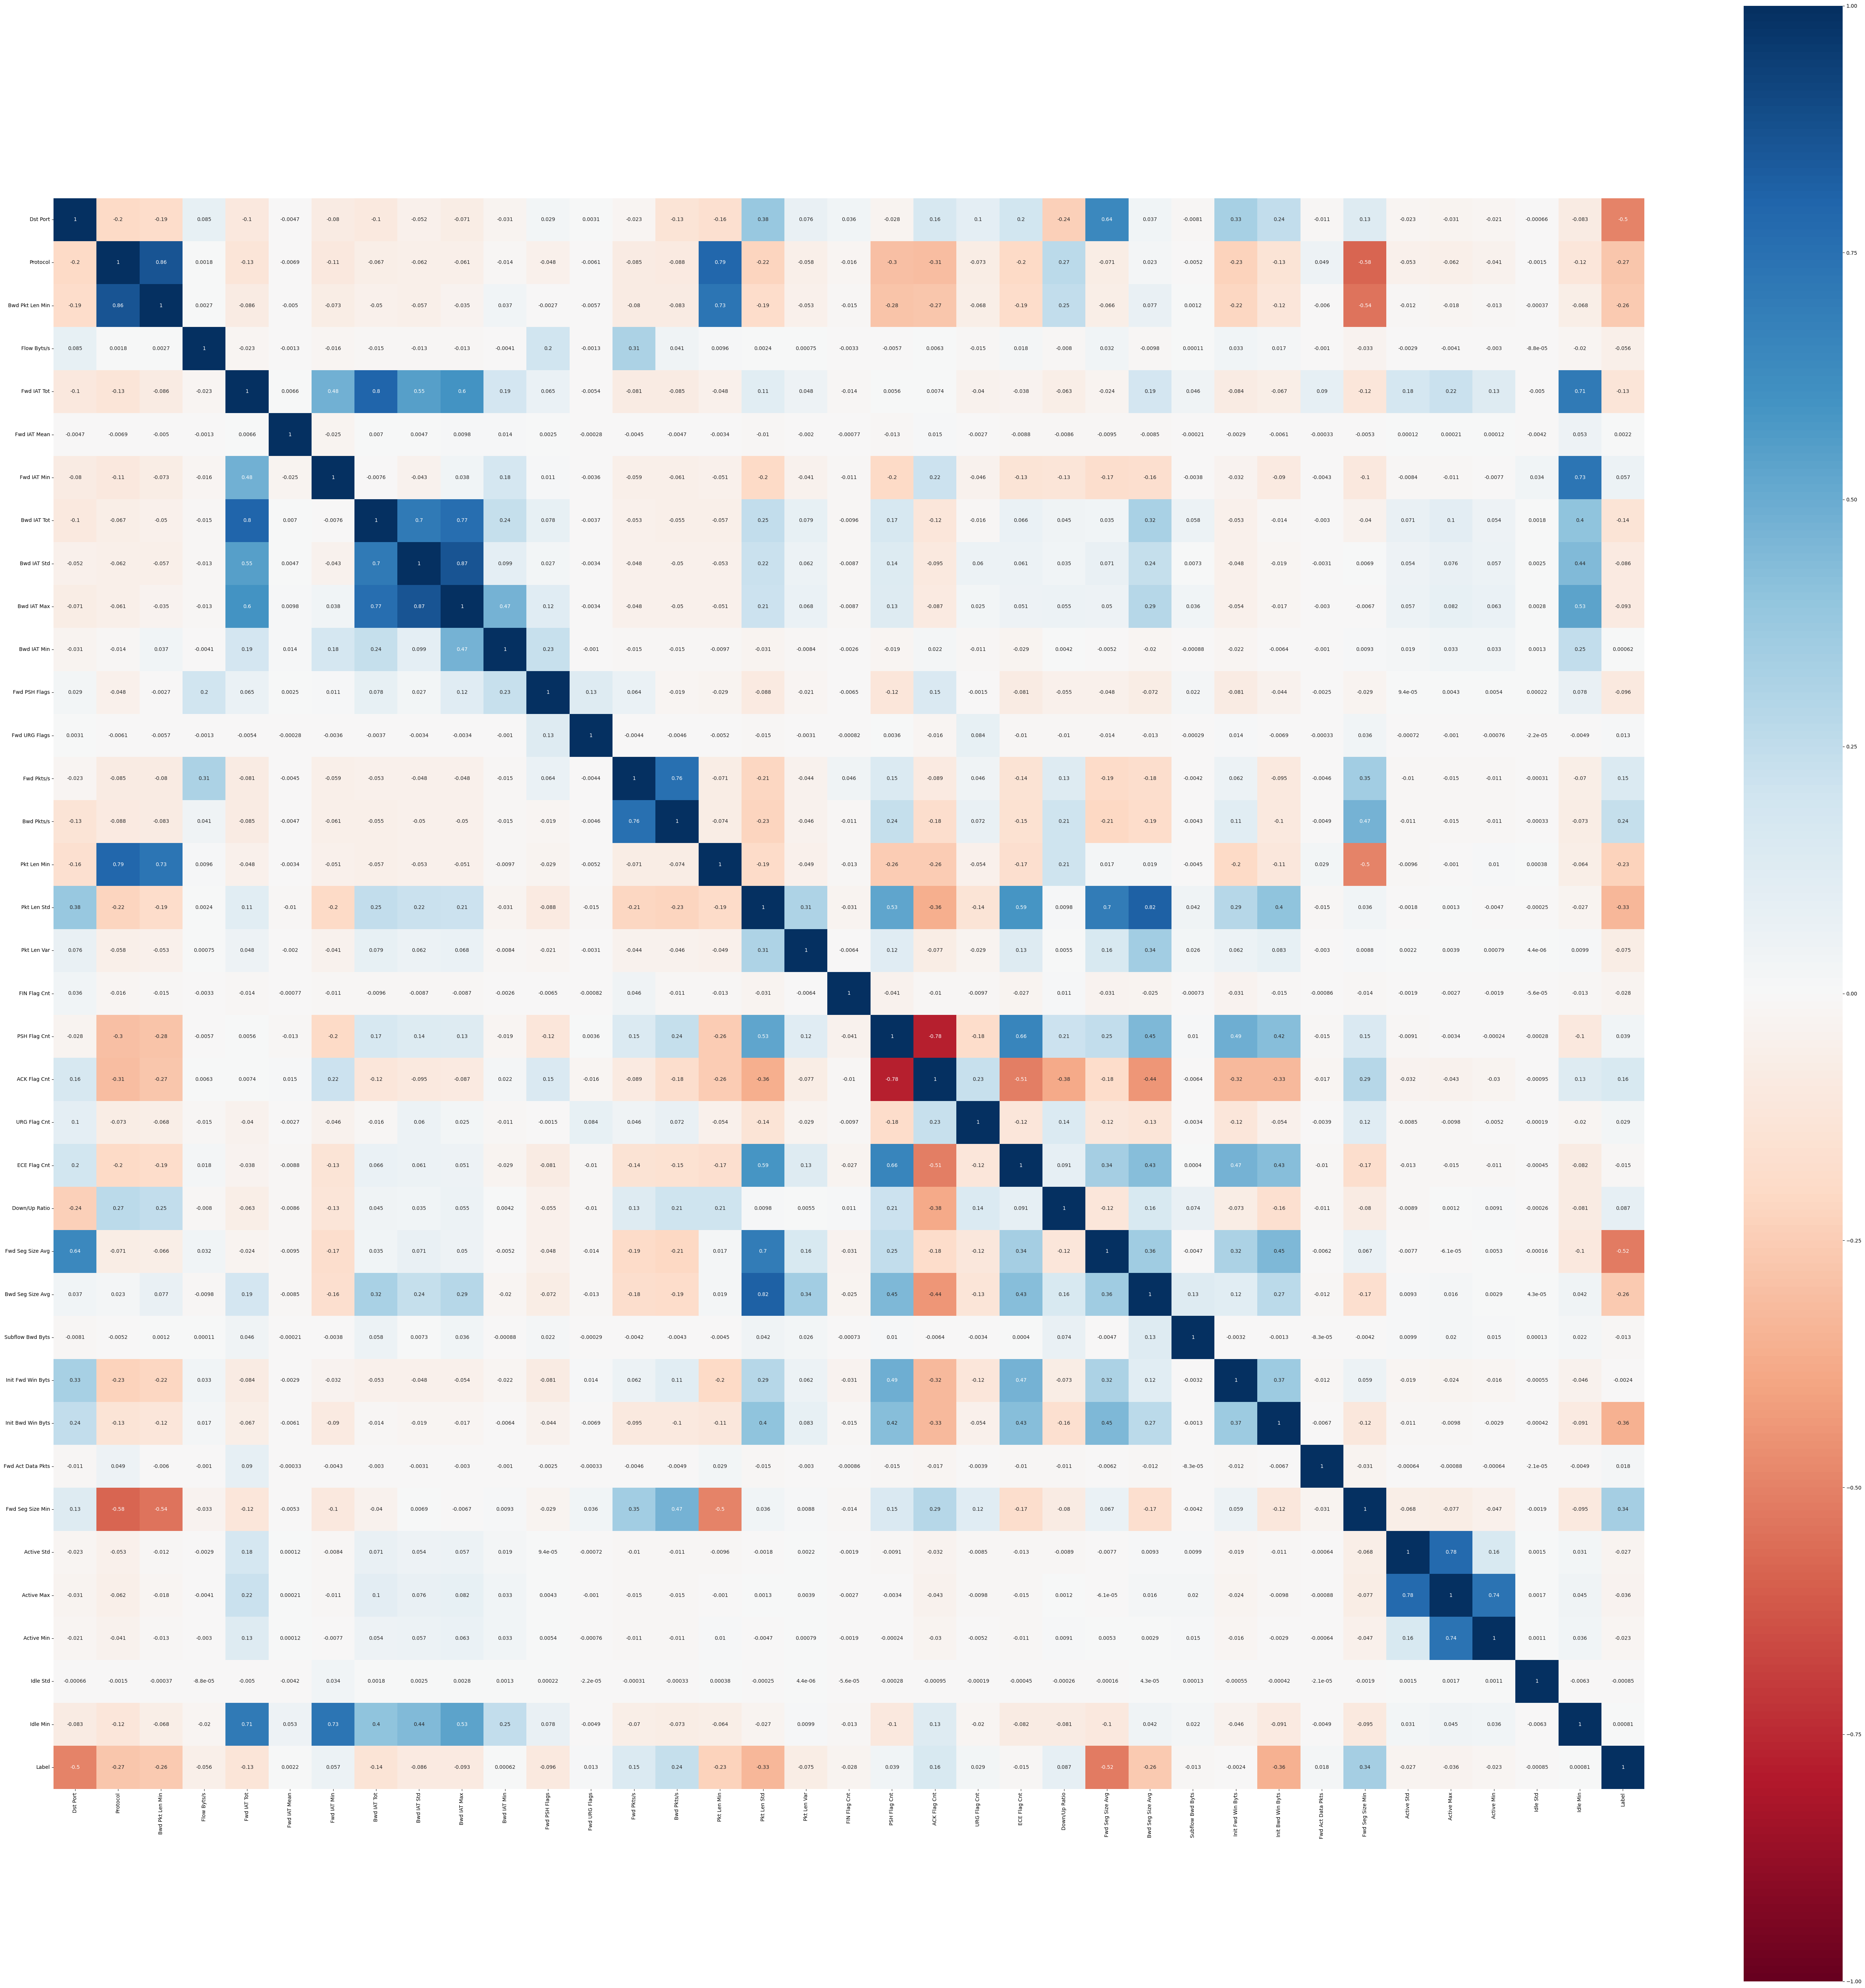

In [51]:
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [52]:
network_data.to_csv('./cic-ids.csv', index=False)

In [55]:
network_data.columns

Index(['Dst Port', 'Protocol', 'Bwd Pkt Len Min', 'Flow Byts/s', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Std', 'Active Max',
       'Active Min', 'Idle Std', 'Idle Min', 'Label'],
      dtype='object')

In [61]:
X=network_data.drop(["Label"], axis=1)
y=network_data["Label"]

In [63]:
# split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

In [64]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [68]:
def confusionMatrixHeatMap(cm, title):
    # box lebels
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    # categories
    categories = ['Benign', 'Malicious']

    # create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', cbar=False, xticklabels=categories, yticklabels=categories)

    # create and add rectangle patch
    ax = plt.gca()
    rect = patches.Rectangle((0, 0), len(cm[0]), len(cm), linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(rect)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    title_font = { 'fontsize': 16, 'fontname': 'Times New Roman' }
#     plt.title('Decision Tree\n', **title_font)
    plt.title(title + '\n', **title_font)

    # calculate accuracy and misclassification rate
    total_samples = len(y)
    correct_predictions = sum(y == y_pred)
    incorrect_predictions = total_samples - correct_predictions
    accuracy = correct_predictions / total_samples
    misclassification_rate = incorrect_predictions / total_samples

    plt.text(0.5, -0.1, f'\n\n\nAccuracy: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, f'\nMisclassification Rate: {misclassification_rate:.4f}', ha='center', va='center', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

MODELS

In [69]:
dt = DecisionTreeClassifier()

# predict
y_pred = cross_val_predict(dt, X, y, cv=kf)


print ("Dicision Tree")
# generate report
cm=confusion_matrix(y, y_pred)
cr=classification_report(y, y_pred)
auc = roc_auc_score(y, y_pred)

print("Confusion Matrix:")
print(cm)

print("Performance Matrix:")
print(cr)

print("AUC:", auc)

confusionMatrixHeatMap(cm, title="Decision Tree")

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier()

# predict
y_pred = cross_val_predict(rf, X, y, cv=kf)

print ("Random Forest")
# generate report
cm=confusion_matrix(y, y_pred)
cr=classification_report(y, y_pred)

print("Confusion Matrix:")
print(cm)

print("Performance Matrix:")
print(cr)

In [ ]:
# create a LightGBM model
lgb = LGBMClassifier()

# predict
y_pred = cross_val_predict(lgb, X, y, cv=kf)

print ("LightGBM")
# generate report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Performance Matrix:")
print(classification_report(y, y_pred))


In [ ]:
# create a KNN model
knn = KNeighborsClassifier()

# predict
y_pred = cross_val_predict(knn, X, y, cv=kf)

print ("KNN")
# generate report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Performance Matrix:")
print(classification_report(y, y_pred))


In [ ]:
# create a SVC model
svc = SVC()

# predict
y_pred = cross_val_predict(svc, X, y, cv=kf)

print ("Support Vector Classifier")
# generate report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("Performance Matrix:")
print(classification_report(y, y_pred))